Importing packages for different calculations

In [74]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib as mpl
import scipy.stats as si

Importing data for "FTM-USD" from yahoo finance for two year time period.

In [75]:
initial_data = yf.download("FTM-USD", start="2020-01-01", end="2022-01-01")

[*********************100%***********************]  1 of 1 completed


In [76]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-10-01,0.895707,1.062013,0.891464,1.047109,1.047109,375280491
2021-10-02,1.046003,1.125039,1.006894,1.077703,1.077703,293084087
2021-10-03,1.077109,1.140562,1.040435,1.082802,1.082802,285144339
2021-10-04,1.080990,1.080990,0.995376,1.024278,1.024278,268400866
2021-10-05,1.026659,1.066878,1.005726,1.036824,1.036824,186919630


In [77]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-12-27,1.743803,1.825405,1.624484,1.631361,1.631361,558038745
2021-12-28,1.636543,1.758312,1.547246,1.660879,1.660879,978085525
2021-12-29,1.660347,1.762378,1.559253,1.576418,1.576418,720128959
2021-12-30,1.582509,1.648243,1.509490,1.560978,1.560978,452338311
2021-12-31,1.556914,1.721622,1.542979,1.666408,1.666408,564760613


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000156C4AB0A20>,
      dtype=object)

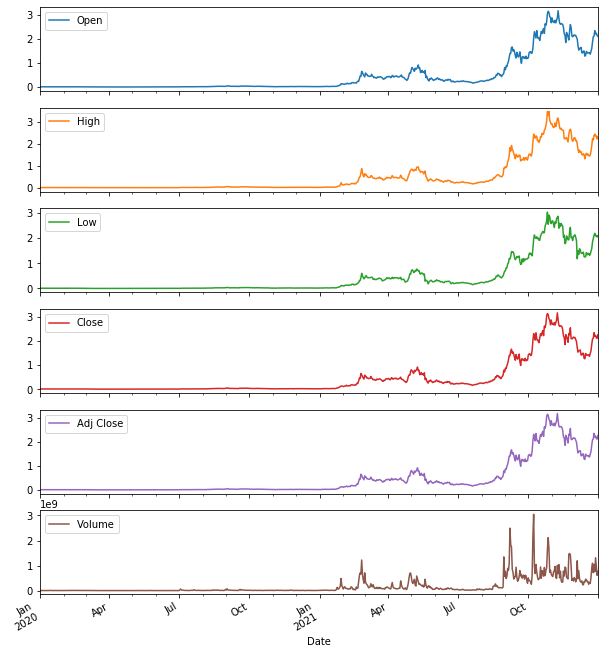

In [80]:
initial_data.plot(figsize=(10, 12), subplots=True)

For Annualized volatility, 3-month data is being used.

In [86]:
data = yf.download("FTM-USD", start="2021-10-01", end="2022-01-01")

[*********************100%***********************]  1 of 1 completed


First we have to find the log returns of the closing prices of the cryptocurrency

In [87]:
log_return = np.log(data['Adj Close'] / data['Adj Close'].shift(1))

In order to annualized the volatiliy, multiplying it with square root of 365 i.e. the trading days of the crypocurrency per year

In [88]:
vol = np.sqrt(365) * log_return.std()
print('The annualised volatility is', round(vol*100,2), '%')

The annualised volatility is 156.84 %


In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as si
import yfinance as yf

Methodologies to use to calculate prices for the call option
1) Black Scholes method
2) Monte Carlo Simulation

# 1) Black Scholes Method

In [90]:
def euro_option_bs(S, K, T, r, vol, payoff):
    
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        option_value = S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        option_value = - S * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value

In [91]:
S = 0.25
K = 0.35
T = 0.25   # 3 Months time period
r = 0.03
q = 0

In [92]:
euro_option_bs(S, K, T, r, vol, 'call')

0.04983484103560777

In [93]:
S = np.linspace(0.1,0.35,11)
cp = np.zeros((len(S),1))
for i in range(len(S)):
    cp[i] = euro_option_bs(S[i], 0.35, 0.25, 0.03, 1.56, 'call')


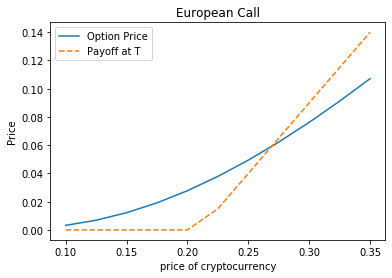

In [94]:
fig = plt.figure()
plt.plot(S, cp, '-')
plt.plot(S, np.maximum(S-0.21,0), '--')
plt.xlabel('price of cryptocurrency')
plt.ylabel('Price')
plt.title('European Call')
plt.legend(['Option Price','Payoff at T'])

Call price from Black Scholes method

# 2) Monte Carlo Simulation

In [95]:
def mcs_simulation_np(p):
    M = p
    I = p
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - vol ** 2 / 2) * dt + vol * np.sqrt(dt) * rn[t]) 
    return S

In [96]:
T = 0.25
r = 0.03
vol = 1.56
S0 = 0.25
K = 0.35

In [97]:
S = mcs_simulation_np(1000)

In [98]:
S = np.transpose(S)
S

array([[0.25      , 0.25495246, 0.24869128, ..., 0.15117664, 0.14899963,
        0.145807  ],
       [0.25      , 0.23977876, 0.24178198, ..., 0.23553707, 0.23967311,
        0.24211741],
       [0.25      , 0.24474159, 0.25070761, ..., 0.1368204 , 0.13726708,
        0.1413623 ],
       ...,
       [0.25      , 0.25732769, 0.25370481, ..., 0.24474011, 0.24705387,
        0.25351181],
       [0.25      , 0.25650726, 0.26863956, ..., 0.2758711 , 0.27489335,
        0.26583788],
       [0.25      , 0.24712204, 0.24992183, ..., 0.83090705, 0.83040126,
        0.82364583]])

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-preiod values')

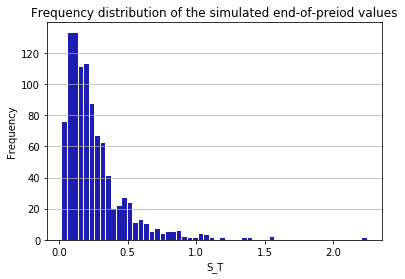

In [99]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=S[:,-1], bins='auto', color='#0504aa',alpha=0.9, rwidth=0.85)

plt.grid(axis='y', alpha=0.9)
plt.xlabel('S_T')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-preiod values')

In [100]:
c = np.mean(np.maximum(S[:,-1] - K,0))
print('European call', str(c))

European call 0.04784220691392196


### Calculating greeks for risk management

In order to draw graph for each greek, Importing package for 3d graph

In [101]:
from mpl_toolkits.mplot3d import Axes3D

# Greeks

## 1) Delta

In [102]:
def delta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = np.exp(- q * T) * si.norm.cdf(d1, 0.0, 1.0)
    elif payoff == "put":
        delta =  - np.exp(- q * T) * si.norm.cdf(- d1, 0.0, 1.0)
    
    return delta

In [103]:
S = np.linspace(0.10, 0.50, 30)
T = np.linspace(0.10, 0.7, 30)
Delta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Delta[i,j] = delta(S[j], 0.35, T[i], 0.03, 0, 1.56, 'call')

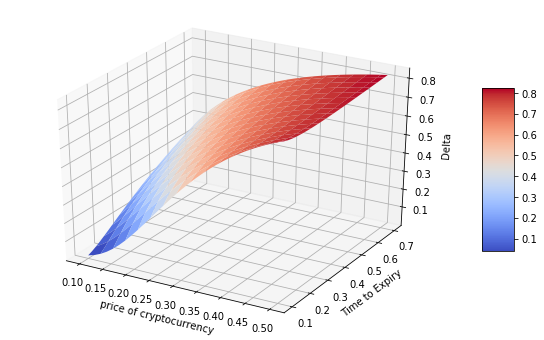

In [104]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Delta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('price of cryptocurrency')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Delta')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [112]:
d = delta(0.25, 0.35, 0.25, 0.03, 0, 1.56, 'call')
print('The value of Delta is', d.round(4),'.','If the stock price increase 1 dollar, then the value of the option will increase $', d.round(4), '.')

The value of Delta is 0.4873 . If the stock price increase 1 dollar, then the value of the option will increase $ 0.4873 .


### 2) Gamma

In [113]:
def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(- r * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * np.sqrt(T))
    
    return gamma

In [114]:
S = np.linspace(0.10, 0.35, 50)
T = np.linspace(0.10, 0.50, 50)
Gamma = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Gamma[i,j] = gamma(S[j], 0.35, T[i], 0.03, 0, 1.56, 'call')

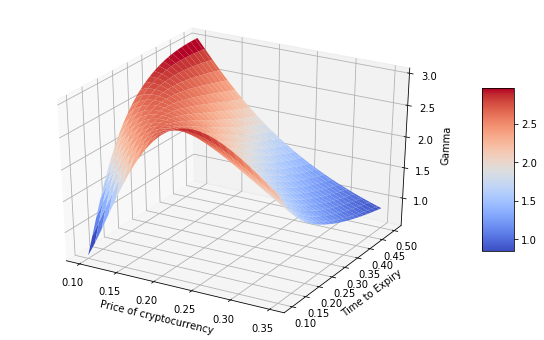

In [115]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Gamma, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Price of cryptocurrency')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Gamma')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [116]:
def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * np.sqrt(T))
    
    return gamma

In [117]:
gamma(0.25, 0.35, 0.25, 0.03, 0, 1.56, 'call')

2.044826329325133

## 3) Speed

In [142]:
def speed(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    speed = - np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / ((vol **2) * (S**2) * np.sqrt(T)) * (d1 + vol * np.sqrt(T))
    
    return speed

In [143]:
S = np.linspace(0.10, 0.35, 50)
T = np.linspace(0.10, 0.50, 50)
Speed = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Speed[i,j] = speed(S[j], 0.35, T[i], 0.03, 0, 1.56, 'call')

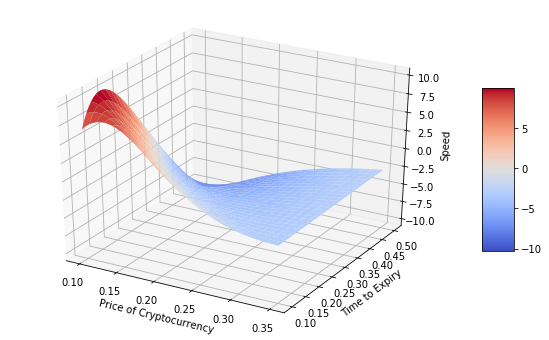

In [144]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Speed, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Price of Cryptocurrency')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Speed')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [157]:
speed(0.25, 0.35, 0.25, 0.03, 0, 1.56, 'call')

-3.9231341784420857

## 4) Theta

In [122]:
def theta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        theta = vol * S * np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        theta = vol * S * np.exp(- q * T) * si.norm.pdf(-d1, 0.0, 1.0) / (2 * np.sqrt(T)) + q * S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) - r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta

In [123]:
S = np.linspace(0.10, 0.35, 50)
T = np.linspace(0.10, 0.50, 50)
Theta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Theta[i,j] = theta(S[j], 0.35, T[i], 0.03, 0, 1.56, 'call')

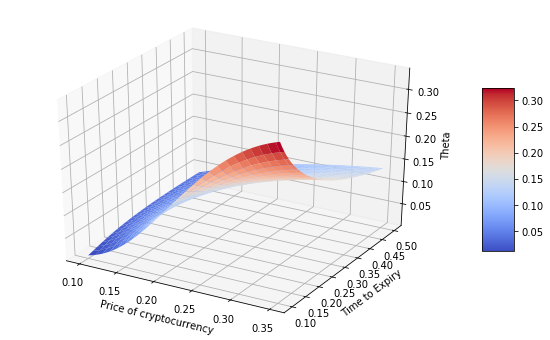

In [124]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Theta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Price of cryptocurrency')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Theta')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [125]:
theta(0.25, 0.35, 0.25, 0.03, 0, 1.56, 'call')

0.1576815684520732

## 5) Rho

In [126]:
def rho(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        rho = - K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho

In [127]:
S = np.linspace(0.1, 0.35, 50)
T = np.linspace(0.1, 0.50, 50)
Rho = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Rho[i,j] = rho(S[j], 0.35, T[i], 0.03, 0, 1.56, 'call')

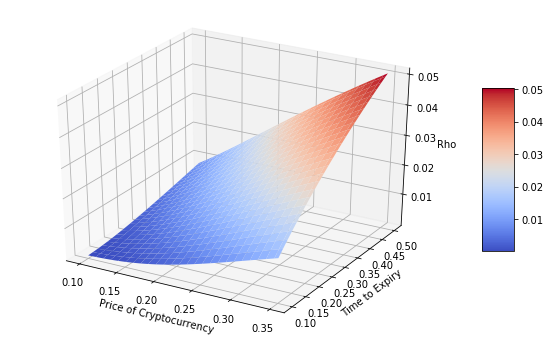

In [128]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Rho, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Price of Cryptocurrency')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Rho')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [129]:
rho(0.25, 0.35, 0.25, 0.03, 0, 1.56, 'call')

0.018104384224140162

## 6) Vega

In [130]:
def vega(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    vega = S * np.sqrt(T) * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0)
    
    return vega

In [131]:
S = np.linspace(0.25, 0.35, 50)
T = np.linspace(0.1, 0.50, 50)
Vega = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Vega[i,j] = vega(S[j], 0.35, T[i], 0.03, 0, 1.56, 'call')

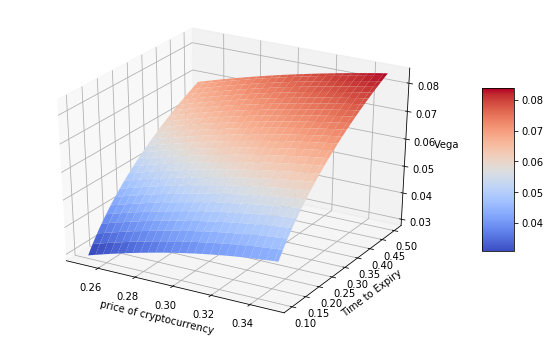

In [132]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Vega, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('price of cryptocurrency')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Vega')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [134]:
v = vega(0.25, 0.35, 0.25, 0.03, 0, 1.56, 'call')
print('The value of Vega is', v.round(4),'.','If the volatility increases 1%, then the value of the option will increase $', v.round(4)*0.01, '.')

The value of Vega is 0.0498 . If the volatility increases 1%, then the value of the option will increase $ 0.000498 .
